# Introduction to Genetic Algorithms

Adapted from [Introduction to Genetic Algorithms — Including Example Code](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)

*A genetic algorithm is a search heuristic that is inspired by Charles Darwin’s theory of natural evolution.*

Only the strongest will survive!

*** 

Six phases are considered in a genetic algorithm.
1. Initial population
2. Fitness function
3. Selection
4. Crossover
5. Mutation
6. Termination

Steps {2,3,4,5} are repeated in a loop until termination!

## 1. Initial Population

**Terms**
* Population: set of **individuals**
* Individual: characterized by a set of parameters (variables) known as **Genes**
* Genes are joined into a string to form a **Chromosome** (solution).

In a genetic algorithm, the set of genes of an individual is represented using binary values (string of 1s and 0s). 

*We say that we encode the genes in a chromosome.*

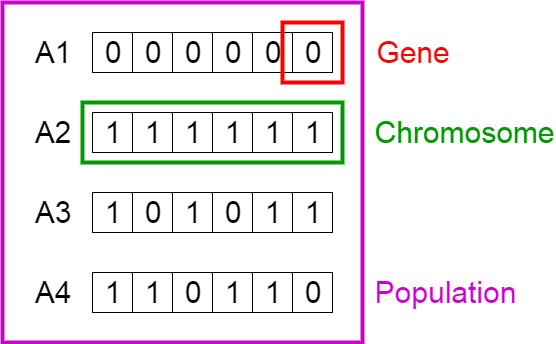

**An individual is made up of a set of chromosomes which are made up of a set of genes. The best individual should have the best chromosome recipe!**

## 2. Fitness Function

The **fitness function** determines how fit an individual is (the ability of an individual to compete with other individuals) and outputs a **fitness score** for each individual. 

*The probability that an individual will be selected for reproduction is based on its fitness score.*


## 3. Selection

* The selection phase selects the fittest individuals and passes their genes to the next generation.
* Two pairs of individuals (parents) are selected based on their fitness scores. 
* Individuals with high fitness have more chance to be selected for reproduction.

## 4. Crossover

*Crossover is the most significant phase in a genetic algorith, it is a used to combine the genetic information of two parents to generate new offspring.* 

For each pair of parents to be mated, a crossover point is chosen at random from within the genes.

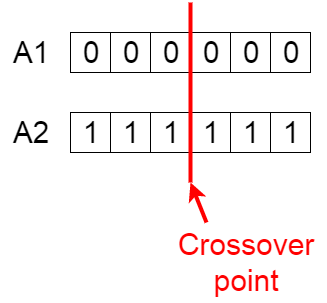


Offspring are created by exchanging the genes of parents among themselves until the crossover point is reached.

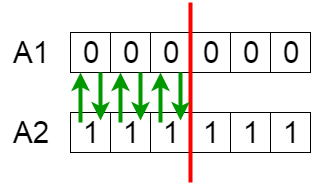

The new offspring are then added to the population.

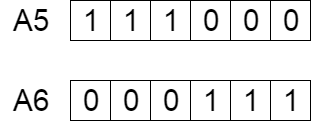

## 5. Mutation

Some of the genes from the new offspring can undergo a mutation with low random probability.

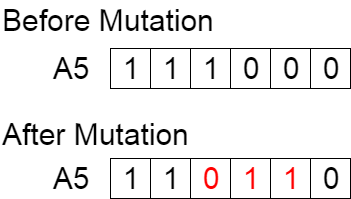

*Mutation occurs to maintain diversity within the population and prevent premature convergence.*

## 6. Termination

The algorithm terminates if the population has converged (new offsprings are not significantly different from the previous generation). 

At which point we can conclude that the genetic algorithm has provided a set of solutions to our problem.

***

## Code Example

`Assuming the population has a fixed size`

```
START
Generate the initial population
Compute fitness
REPEAT
    Selection
    Crossover
    Mutation
    Compute fitness
UNTIL population has converged
STOP
```

### Implementation Details

* Given a set of `n genes`, each gene can hold one of the binary values 0 and 1.
    * Assume an individual has only 1 chromosome.
* The fitness value is calculated as the number of 1s present in the genome. 
    * If there are `n 1s`, then it has `maximum fitness`. 
    * If there are `no 1s`, then it has `minimum fitness`.
* The mutation rate is `1 / number of genes`.
* This genetic algorithm tries to maximize the fitness function to provide a population consisting of the fittest individual, i.e. individuals with all 1s.
* Note: In this example, after crossover and mutation, the least fit individual is replaced with the new fittest offspring.

In [1]:
import copy
import numpy as np
np.random.seed(0)

In [2]:
class Individual():
    def __init__(self, n_genes=5):
        assert  n_genes >= 1, 'Need at least 1 gene!'
        
        self.fitness = 0
        self.genes = [np.random.randint(2) for i in range(n_genes)]
    
    # --- Calculate an individual's fitness
    def calc_fitness(self):
        self.fitness = sum(self.genes)

In [3]:
class Population():
    def __init__(self, n_individuals=10, n_genes=5):
        assert n_individuals >= 2, 'Need at least 2 individuals!'

        self.fittest = 0
        self.n_genes = n_genes 
        self.n_individuals = n_individuals
        self.individuals = [Individual(n_genes) for _ in range(self.n_individuals)]
        
    # --- Parent 1
    def get_fittest_ind(self):
        fitnesses = [individual.fitness for individual in self.individuals]
        ind_fitnesses = np.argsort(fitnesses)
        return ind_fitnesses[-1]
    
    # --- Parent 2
    def get_next_fittest_ind(self):
        fitnesses = [individual.fitness for individual in self.individuals]
        ind_fitnesses = np.argsort(fitnesses)
        return ind_fitnesses[-2]
    
    # --- Child to abandon :(
    def get_least_fittest_ind(self):
        fitnesses = [individual.fitness for individual in self.individuals]
        ind_fitnesses = np.argsort(fitnesses)
        return ind_fitnesses[0]
    
    # --- Get individual from ind methods
    def get_individual(self, ind_individual):
        return self.individuals[ind_individual]
    
    # --- Calculate fitness for all individuals
    def calc_fitness(self):  
        for i in range(self.n_individuals):
            self.individuals[i].calc_fitness()
            
        # --- Only using this to get the fitness of the fittest
        self.fittest = self.individuals[self.get_fittest_ind()].fitness
    
    # --- Get fitness and genes for a population
    def get_fitness_and_genes(self):
        return [{'individual': i,
                 'fitness': self.individuals[i].fitness, 
                 'genes':   self.individuals[i].genes[:]}
                for i in range(self.n_individuals)]

In [4]:
class Generation():  
    def __init__(self, n_individuals=10, n_genes=5):
        # 1. --- Initialize population
        self.population = Population(n_individuals, n_genes)
        self.fittest = None
        self.next_fittest = None
        self.generation_counter = 0
    
    # --- Select the two fittest individuals
    def selection(self):
        ind_fittest = self.population.get_fittest_ind()
        self.fittest = self.population.get_individual(ind_fittest)
        
        ind_next_fittest = self.population.get_next_fittest_ind()
        self.next_fittest = self.population.get_individual(ind_next_fittest)
        
    # --- Swap an element between two lists
    def swap(self, a, b):
        a, b = b, a
    
    # --- Pick a random split point and swap genes between individuals
    def crossover(self):
        crosspoint = np.random.randint(self.population.n_genes)

        for i in range(crosspoint):
            self.swap(self.fittest.genes[i], self.next_fittest.genes[i])
    
    # --- Randomly mutate a gene for the best individual's
    def mutation(self):
        mutationpoint = np.random.randint(self.population.n_genes)
        if self.fittest.genes[mutationpoint] == 1:
            self.fittest.genes[mutationpoint] = 0
        else:
            self.fittest.genes[mutationpoint] = 1
            
        mutationpoint = np.random.randint(self.population.n_genes)
        if self.next_fittest.genes[mutationpoint] == 1:
            self.next_fittest.genes[mutationpoint] = 0
        else:
            self.next_fittest.genes[mutationpoint] = 1
    
    # --- Get best offspring
    def get_fittest_offspring(self):
        if (self.fittest.fitness > self.next_fittest.fitness):
            return self.fittest
        else:
            return self.next_fittest
    
    # --- Add best offspring
    def add_fittest_offspring(self):
        assert self.fittest != self.next_fittest
        
        # --- Update fitness values best individuals
        self.fittest.calc_fitness()
        self.next_fittest.calc_fitness()
        
        # --- Get index of weakest individual
        ind_least_fit = self.population.get_least_fittest_ind()
    
        # --- Replace weakest individual with strongest
        self.population.individuals[ind_least_fit] = copy.deepcopy(self.get_fittest_offspring())

In [5]:
class Genetic_Algorithm():
    def __init__(self, n_individuals=10, n_genes=5):
        self.n_genes = n_genes
        self.generation = Generation(n_individuals, n_genes)
        self.generations = []
        
     # --- Run genetic evolution algorithm
    def solve(self):
        # --- 2. Initial population's fitness
        self.generation.population.calc_fitness()
        self.generations.append(self.generation.population.get_fitness_and_genes())
        self.generations.append([{'Generation': self.generation.generation_counter,
                                 'Fittest'    : self.generation.population.fittest}])
        
        while(self.generation.population.fittest < self.generation.population.n_genes):
            self.generation.generation_counter += 1
            
            # --- 3. Selection
            self.generation.selection()
            
            # --- 4. Crossover
            self.generation.crossover()
            
            # --- 5. Mutation (rate = 1 / n_genes)
            if np.random.randint(self.n_genes) == 0:
                self.generation.mutation()
            
            # --- Calculate new fittness
            self.generation.population.calc_fitness()
            
            # --- Update population
            self.generations.append(self.generation.population.get_fitness_and_genes())  
            self.generation.add_fittest_offspring()
            
            self.generations.append([{'Generation': self.generation.generation_counter,
                                     'Fittest'    : self.generation.population.fittest}])
            
        print(f"Solution found in generation {self.generation.generation_counter}")
        print(f"Fitness: {self.generation.population.fittest}")
        
    def get_generations(self):
        return self.generations
    
    def print_generations(self):
        generations = self.get_generations()
        
        for generation in generations:
            for item in generation:
                for k in item:
                    print(k, item[k], end='\t')
                print()
            print()

### Run program

```python
# More individuals allows your population to converge faster
# More genes makes your population converge slower
```

In [8]:
# --- Mode collapse if entire population is the same, mutation is suppose to reduce the possibility of mode collapse.
algo = Genetic_Algorithm(n_individuals=5, n_genes=3)
algo.solve()

Solution found in generation 2
Fitness: 3


In [9]:
algo.print_generations()

individual 0	fitness 0	genes [0, 0, 0]	
individual 1	fitness 1	genes [0, 1, 0]	
individual 2	fitness 2	genes [1, 1, 0]	
individual 3	fitness 2	genes [0, 1, 1]	
individual 4	fitness 2	genes [1, 1, 0]	

Generation 0	Fittest 2	

individual 0	fitness 0	genes [0, 0, 0]	
individual 1	fitness 1	genes [0, 1, 0]	
individual 2	fitness 2	genes [1, 1, 0]	
individual 3	fitness 1	genes [0, 0, 1]	
individual 4	fitness 1	genes [0, 1, 0]	

Generation 1	Fittest 2	

individual 0	fitness 1	genes [0, 0, 1]	
individual 1	fitness 1	genes [0, 1, 0]	
individual 2	fitness 3	genes [1, 1, 1]	
individual 3	fitness 1	genes [0, 0, 1]	
individual 4	fitness 2	genes [1, 1, 0]	

Generation 2	Fittest 3	



## Personal Notes

* Fitness function is akin to Reward function in reinforcement learning
* Selection is akin to backpropogation in deep learning
* Crossover is akin to the neural networks
* Mutation is a form of randomization and regularization to promote diversity
* Genetic Algorithms ⊆ Evolutionary algorithms

***

## Next Steps

* [genetic-algorithm-advantages-disadvantages](https://electricalvoice.com/genetic-algorithm-advantages-disadvantages/)
* [difference-between-neural-network-and-evolutionary-algorithm](https://stackoverflow.com/questions/9858121/difference-between-neural-network-and-evolutionary-algorithm)
* [How_to_avoid_repetition_in_the_populations_of_the_Genetic_Algorithm](https://www.researchgate.net/post/How_to_avoid_repetition_in_the_populations_of_the_Genetic_Algorithm)